In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nilearn.input_data
import nilearn.plotting
import nilearn.datasets
import nilearn.input_data

In [2]:
brain_mask = nilearn.datasets.load_mni152_brain_mask()
masker = nilearn.input_data.NiftiMasker(mask_img=brain_mask, standardize=True)
data_dir = "../data/nifti-diff"

In [3]:
# loading data
fmri_filename = "ses-vid001_task-video_run-01_bold.nii.gz"

fmri_1_masked = masker.fit_transform(os.path.join(data_dir, fmri_filename))
fmri_1_arr = nilearn.image.load_img(os.path.join(data_dir, fmri_filename))
fmri_1_arr = nilearn.image.get_data(fmri_1_arr)

In [4]:
# simulated another data (here noise is not the same for masked and raw volumes, but it is just a test)
fmri_2_masked = fmri_1_masked + np.random.normal(size=fmri_1_masked.shape)
fmri_2_arr = fmri_1_arr + np.random.normal(size=fmri_1_arr.shape)

In [5]:
### raw pixels differences
pixel_diff = fmri_1_masked - fmri_2_masked

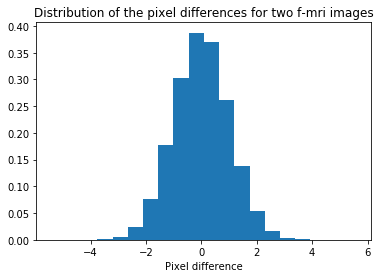

In [6]:
# histogram report
plt.figure()
plt.hist(pixel_diff.flatten(), bins=20, density=True)
plt.title("Distribution of the pixel differences for two f-mri images")
plt.xlabel("Pixel difference")
plt.savefig("distribution.png")
plt.show()

In [7]:
### volume pixel differences

# to reduce memory usage, we loop to all epi data
n_epi = fmri_1_arr.shape[-1]
volume_diff_np = np.zeros(shape=fmri_1_arr.shape[:-1], dtype=np.float32)

for t in range(n_epi):
    volume_diff_np = volume_diff_np + np.abs(fmri_1_arr[..., t] - fmri_2_arr[..., t])

# normalize
volume_diff_np = (volume_diff_np - np.mean(volume_diff_np) + 1e-9) / (np.std(volume_diff_np) +  1e-9)

In [8]:
# Viewing data
volume_diff = nilearn.image.new_img_like(ref_niimg=nilearn.datasets.MNI152_FILE_PATH, data=volume_diff_np)
html_view = nilearn.plotting.view_img(volume_diff, threshold=0.5, vmax=10, cut_coords=[-42, -16, 52], title="Pixel difference")
html_view.save_as_html('volume_noise.html')

from IPython.display import IFrame
IFrame(src='volume_noise.html', width=700, height=600)